In [19]:
import pandas as pd
from pandas.io.json import json_normalize
import json

with open ('conversation_extract_where_chat_gt_2.json') as f:
    data = json.load(f)
    
#Convert the JSON file into a DataFrame
df = json_normalize(data['convos'])
#print the first 5 rows
df.head(5)

,agent_type,chat,id,timestamp,user_nickname,user_type
0,chatbot_agent,"[{'who_said': 'agent', 'what_said': 'Goedendag...",23,2019-05-04T01:38:52Z,Klant-884769z,CLIENT
1,chatbot_agent,"[{'who_said': 'agent', 'what_said': 'Goedendag...",56,2019-05-04T04:10:11Z,Boom,CLIENT
2,chatbot_agent,"[{'who_said': 'agent', 'what_said': 'Goedendag...",85,2019-05-04T05:52:06Z,Arfman,CLIENT
3,human_agent,"[{'who_said': 'agent', 'what_said': 'Fijn dat ...",90,2019-05-04T06:03:50Z,Klant-50799lD,CLIENT
4,chatbot_agent,"[{'who_said': 'agent', 'what_said': 'Goedendag...",91,2019-05-04T06:07:31Z,Lange,CLIENT


In [20]:
#check the data types and the shape of our DataFrame
print(df.dtypes)
print('-------')
print(df.shape)

agent_type       object
chat             object
id                int64
timestamp        object
user_nickname    object
user_type        object
dtype: object
-------
(7337, 6)


In [21]:
#because the json file is nested, we inpacked the nested values for the chatlogs and we stored them into a pandas dataframe
df = json_normalize(data=data['convos'], record_path=['chat'],
                    meta=['id', 'timestamp', 'user_type', 'user_nickname', 'agent_type'])
df.head(25)

,what_said,who_said,id,timestamp,user_type,user_nickname,agent_type
0,"Goedendag, ik ben chatbot Anna, uw online assi...",agent,23,2019-05-04T01:38:52Z,CLIENT,Klant-884769z,chatbot_agent
1,"Eerst even dit: vul nooit uw (pin)codes, priva...",agent,23,2019-05-04T01:38:52Z,CLIENT,Klant-884769z,chatbot_agent
2,Ik snap het,user,23,2019-05-04T01:38:52Z,CLIENT,Klant-884769z,chatbot_agent
3,Kies een onderwerp of stel direct uw vraag.,agent,23,2019-05-04T01:38:52Z,CLIENT,Klant-884769z,chatbot_agent
4,Buitenlandoverboekingen,user,23,2019-05-04T01:38:52Z,CLIENT,Klant-884769z,chatbot_agent
5,Wat is uw vraag over buitenlandoverboekingen?,agent,23,2019-05-04T01:38:52Z,CLIENT,Klant-884769z,chatbot_agent
6,Een buitenlandoverboeking van mij is nog steed...,user,23,2019-05-04T01:38:52Z,CLIENT,Klant-884769z,chatbot_agent
7,Ik heb u helaas niet begrepen. Stel uw vraag ...,agent,23,2019-05-04T01:38:52Z,CLIENT,Klant-884769z,chatbot_agent
8,Wat is uw vraag over buitenland overboekingen?,agent,23,2019-05-04T01:38:52Z,CLIENT,Klant-884769z,chatbot_agent
9,"Goedendag, ik ben chatbot Anna, uw online assi...",agent,56,2019-05-04T04:10:11Z,CLIENT,Boom,chatbot_agent


In [22]:
#Find the unique users with the most unique chats
user_chats = df.groupby('user_nickname')['id'].nunique()
user_chats.sort_values(ascending=False)

user_nickname
Niet Beschikbaar    82
Eyck                 7
Berg                 6
Brouwer              6
Groot                5
Visser               4
Maas                 4
Boer                 4
Graaf                4
Jansen               4
Bruijn               3
Martina              3
Bakker               3
Boersma              3
Veders               3
Janssen              3
Jong                 3
Bos                  3
Dundovic             3
Bressers             3
Schuurmans           3
Sep                  3
Koster               3
Vries                2
Prijs                2
Klomp                2
Steeghs              2
Stoutenbeek          2
Vliet                2
Bekkers              2
                    ..
Klant-69636zd        1
Klant-69661uI        1
Klant-69332c7        1
Klant-69319Dv        1
Klant-69311Bd        1
Klant-69303dA        1
Klant-68900UH        1
Klant-68911NE        1
Klant-689151L        1
Klant-68925Mm        1
Klant-68927L3        1
Klant-68985pW       

In [23]:
print ('The length of the message with the most charactes: ')
print (df.what_said.map(len).max())
print ('\nThe length of the message with the less charactes: ')
print (df.what_said.map(len).min())


#Uncomment this if you want to see which are these messages
#field_length = df.what_said.astype(str).map(len)
#print (df.loc[field_length.argmax(), 'what_said'])
#print("----")
#print (df.loc[field_length.argmin(), 'what_said'])


The length of the message with the most charactes: 
1537

The length of the message with the less charactes: 
1


In [24]:
user_dialogs = df[(df['who_said'] == "user")]
user_dialogs.head(3)

,what_said,who_said,id,timestamp,user_type,user_nickname,agent_type
2,Ik snap het,user,23,2019-05-04T01:38:52Z,CLIENT,Klant-884769z,chatbot_agent
4,Buitenlandoverboekingen,user,23,2019-05-04T01:38:52Z,CLIENT,Klant-884769z,chatbot_agent
6,Een buitenlandoverboeking van mij is nog steed...,user,23,2019-05-04T01:38:52Z,CLIENT,Klant-884769z,chatbot_agent


In [25]:
#Print out how many null values exist for each column
df.apply(lambda x: sum(x.isnull()),axis=0)
df.sort_values(by=['what_said'])

,what_said,who_said,id,timestamp,user_type,user_nickname,agent_type
4263,Ik snap het,user,936,2019-05-05T11:38:35Z,CLIENT,Klant-57877VB,chatbot_agent
11595,Ik snap het,user,2235,2019-05-06T11:15:37Z,CLIENT,Molders,chatbot_agent
34989,Ik snap het,user,5909,2019-05-08T16:50:33Z,CLIENT,Nanuru,chatbot_agent
53171,Ik snap het,user,8681,2019-05-10T18:27:38Z,CLIENT,Bul,chatbot_agent
59229,Ik snap het,user,9921,2019-05-12T13:20:34Z,CLIENT,Wessels,chatbot_agent
42989,Ik snap het,user,7171,2019-05-09T15:05:25Z,CLIENT,Klant-85865h7,chatbot_agent
23068,Ik snap het,user,4093,2019-05-07T12:46:28Z,CLIENT,Zon,chatbot_agent
90363,Ik snap het,user,17827,2019-05-16T08:26:55Z,CLIENT,Klant-59164Gn,chatbot_agent
53182,Ik snap het,user,8690,2019-05-10T18:42:14Z,CLIENT,ben Salah,chatbot_agent
67169,Ik snap het,user,11141,2019-05-13T14:15:05Z,CLIENT,Masbahi,chatbot_agent


In [26]:
#remove irrelevant columns
df = user_dialogs.drop(columns=['who_said', 'id', 'timestamp', 'user_type', 'user_nickname', 'agent_type'], axis=1)
df.head(5)

,what_said
2,Ik snap het
4,Buitenlandoverboekingen
6,Een buitenlandoverboeking van mij is nog steed...
11,Ik snap het
16,Ik snap het


In [27]:
import re

#remove punctuation
df['what_said'] = df['what_said'].map(lambda x:
                                     re.sub('[,\.!?]', '', x))
#remove non-letters
df['what_said'] = df['what_said'].map(lambda x:
                                     re.sub('[^a-zA-Z]', ' ', x))
# convert to lower
df['what_said'] = df['what_said'].map(lambda x: x.lower())

#remove urls and links
df['what_said'] = df['what_said'].str.replace('http\S+|www\S+', '', case=False)

#print the first rows
df['what_said'].head(10)

2                                          ik snap het 
4                               buitenlandoverboekingen
6     een buitenlandoverboeking van mij is nog steed...
11                                         ik snap het 
16                                         ik snap het 
21                                          goeiemorgen
22    als ik wil inloggen op internet bankieren krij...
23    er is een technische fout opgetreden als u con...
26    oke thanks dat helpt me al een hoop want ik zo...
27    volgens mij heb ik ook al een andere pas gekre...
Name: what_said, dtype: object

In [28]:
#Tokenize each word
import nltk
#nltk.download()
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['what_said']), axis=1)
df['tokenized_sents'].head(10)

2                                       [ik, snap, het]
4                             [buitenlandoverboekingen]
6     [een, buitenlandoverboeking, van, mij, is, nog...
11                                      [ik, snap, het]
16                                      [ik, snap, het]
21                                        [goeiemorgen]
22    [als, ik, wil, inloggen, op, internet, bankier...
23    [er, is, een, technische, fout, opgetreden, al...
26    [oke, thanks, dat, helpt, me, al, een, hoop, w...
27    [volgens, mij, heb, ik, ook, al, een, andere, ...
Name: tokenized_sents, dtype: object

In [29]:
from stop_words import get_stop_words
dutch_Stop_Words = get_stop_words('dutch')

def remove_stops(row):
    my_list = row['tokenized_sents']
    meaningful_words = [w for w in my_list if not w in dutch_Stop_Words]
    return (meaningful_words)

df['tokenized_sents'] = df.apply(remove_stops, axis=1)
df['tokenized_sents'].head(10)

2                                                [snap]
4                             [buitenlandoverboekingen]
6     [buitenlandoverboeking, steeds, behandeling, l...
11                                               [snap]
16                                               [snap]
21                                        [goeiemorgen]
22    [inloggen, internet, bankieren, krijg, volgend...
23    [technische, fout, opgetreden, contact, opneem...
26      [oke, thanks, helpt, hoop, gaan, winkelen, pas]
27    [volgens, pas, gekregen, via, post, maandje, t...
Name: tokenized_sents, dtype: object

In [30]:
def rejoin_words(row):
    my_list = row['tokenized_sents']
    joined_words = ( " ".join(my_list))
    return joined_words

df['clean_data'] = df.apply(rejoin_words, axis=1)
df['clean_data'].head(10)

2                                                  snap
4                               buitenlandoverboekingen
6     buitenlandoverboeking steeds behandeling lang ...
11                                                 snap
16                                                 snap
21                                          goeiemorgen
22    inloggen internet bankieren krijg volgende fou...
23    technische fout opgetreden contact opneemt mel...
26              oke thanks helpt hoop gaan winkelen pas
27    volgens pas gekregen via post maandje terug ga...
Name: clean_data, dtype: object

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['clean_data'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['clean_data' , 'count'])
#df1.groupby('clean_data').sum()['count'].astype(float).sort_values(ascending=False).iplot(
#    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in review before removing stop words')
df1.head(3)

rekening 3154
wel 2536
bedankt 1915
ok 1830
dank 1742
nee 1714
snap 1672
pas 1557
ga 1470
vraag 1401
staat 1383
via 1292
oke 1265
graag 1248
jullie 1219
abn 1213
nieuwe 1147
we 1061
krijg 971
geld 957


,clean_data,count
0,rekening,3154
1,wel,2536
2,bedankt,1915


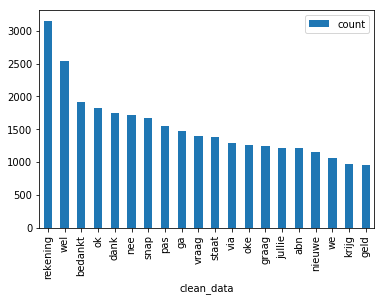

In [32]:
ax = df1.plot(kind='bar', x='clean_data')
fig = ax.get_figure()
fig.savefig('frequent_words_graph.png')

In [34]:
def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))

df3 = df
#df3['ngrams'] = df3['clean_data'].map(lambda x: find_ngrams(x.split(" "),2))
df3.head()

,what_said,tokenized_sents,clean_data
2,ik snap het,[snap],snap
4,buitenlandoverboekingen,[buitenlandoverboekingen],buitenlandoverboekingen
6,een buitenlandoverboeking van mij is nog steed...,"[buitenlandoverboeking, steeds, behandeling, l...",buitenlandoverboeking steeds behandeling lang ...
11,ik snap het,[snap],snap
16,ik snap het,[snap],snap


In [48]:
######################## Find N-Grams ########################
from collections import Counter
from itertools import chain

#This function is called from find_most_common_n_grams()
def find_ngrams(input_list, n, n_common_words):
    return list(zip(*[input_list[i:] for i in range(n)]))


########### [Input] ###########
########## df: The DataFrame with the data that would like to process
########## n: The number of N-grams 
########## n_top_ngrams: The number the X most common N-grams
########## Returns: A list with the X most common N-grams and their occurrences 
def find_most_common_n_grams(df, n, n_top_ngrams):
    
    n_grams_title = str(n) +'_grams'
    
    df3[n_grams_title] = df['clean_data'].map(lambda x: find_ngrams(x.split(" "), n, 10))
    
    ngrams = df[n_grams_title].tolist()
    ngrams = list(chain(*ngrams))

    #TODO this: should have x,y,z as the n increases 
    # e.g. [(x.lower(), y.lower(), z.lower()) for x,y,z in ngrams] #--> For 3-grams etc.
    #ngrams = [(x.lower(), y.lower()) for x,y in ngrams]

    ngram_counts = Counter(ngrams)
    return ngram_counts.most_common(n_top_ngrams)

#4 stands for: fourgrams. Change to any n value
#20 stands for: display the top 20 n-grams
testing = find_most_common_n_grams(df3, 4, 20)
df3.head(3)
testing

[(('i', 'would', 'like', 'to'), 44),
 (('have', 'a', 'nice', 'day'), 30),
 (('dank', 'wel', 'fijne', 'dag'), 25),
 (('thank', 'you', 'very', 'much'), 19),
 (('aanvraag', 'voortgezet', 'kunt', 'onze'), 15),
 (('voortgezet', 'kunt', 'onze', 'medewerkers'), 15),
 (('abn', 'amro', 'bank', 'nv'), 15),
 (('bedankt', 'hulp', 'fijne', 'dag'), 14),
 (('kunt', 'onze', 'medewerkers', 'bereiken'), 14),
 (('do', 'you', 'speak', 'english'), 14),
 (('i', 'have', 'a', 'question'), 14),
 (('bedankt', 'fijne', 'dag', 'verder'), 13),
 (('gegevens', 'kunt', 'inloggen', 'controleer'), 13),
 (('kunt', 'inloggen', 'controleer', 'rekeningnummer'), 13),
 (('inloggen', 'controleer', 'rekeningnummer', 'pasnummer'), 13),
 (('onze', 'medewerkers', 'bereiken', 'gebruikelijke'), 13),
 (('medewerkers', 'bereiken', 'gebruikelijke', 'belkosten'), 13),
 (('bereiken', 'gebruikelijke', 'belkosten', 'kom'), 13),
 (('gebruikelijke', 'belkosten', 'kom', 'langs'), 13),
 (('belkosten', 'kom', 'langs', 'bankkantoor'), 13)]

In [60]:
######################## Find N-Grams ########################
from collections import Counter
from itertools import chain

########### [Input] ###########
########## df: The DataFrame with the data that would like to process
########## n: The number of N-grams 
########## Returns: A list with the 10 most common N-grams

def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))

def find_most_common_n_grams(df, n):
    
    n_grams_title = str(n) +'_grams'
    
    df3[n_grams_title] = df['what_said'].map(lambda x: find_ngrams(x.split(" "), n))
    
    ngrams = df[n_grams_title].tolist()
    ngrams = list(chain(*ngrams))
    
    #TODO this: should have x,y,z as the n increases
    ngrams = [(x.lower(), y.lower()) for x,y in ngrams]

    ngram_counts = Counter(ngrams)
    return ngram_counts.most_common(10)

In [62]:
from collections import Counter
from itertools import chain

bigrams = df['ngrams'].tolist()
bigrams = list(chain(*bigrams))
bigrams = [(x.lower(), y.lower(), z.lower()) for x,y,z in bigrams]

bigram_counts = Counter(bigrams)
bigram_counts.most_common(20)
#type(df['trigrams'])

ValueError: too many values to unpack (expected 3)

In [328]:
df3['num_wds'] = df['clean_data'].apply(lambda x: len(x.split()))
#diplay the average number of words within a message
df3['num_wds'].mean()

4.788925196502694

In [329]:
df3['num_wds'].max()

121

In [330]:
df3['num_wds'].min()

0

In [331]:
len(df3[df3['num_wds']==0])

1898

In [332]:
df3.head()

,what_said,tokenized_sents,clean_data,bigrams,num_wds
2,ik snap het,[snap],snap,[],1
4,buitenlandoverboekingen,[buitenlandoverboekingen],buitenlandoverboekingen,[],1
6,een buitenlandoverboeking van mij is nog steed...,"[buitenlandoverboeking, steeds, behandeling, l...",buitenlandoverboeking steeds behandeling lang ...,"[(buitenlandoverboeking, steeds), (steeds, beh...",6
11,ik snap het,[snap],snap,[],1
16,ik snap het,[snap],snap,[],1


In [333]:
df3.sort_values(by=['what_said'])

,what_said,tokenized_sents,clean_data,bigrams,num_wds
69299,,[],,[],0
82182,,[],,[],0
11894,,[],,[],0
15498,,[],,[],0
35528,,[],,[],0
14876,,[],,[],0
17139,,[],,[],0
63360,,[],,[],0
184,,[],,[],0
84857,,[],,[],0


In [334]:
df3 = df3[df3['num_wds']>0]
df3['num_wds'].mean()

4.9983868737613495

In [335]:
#### Create CSV in the format that Danny requested it #######
#df_danny2 = df3
#df_to_csv = df3['clean_data']
#df_to_csv = df_to_csv.astype(str)+','
#df_to_csv.to_csv('danny_csv.csv', encoding='utf-8', index=False)
#df_to_csv.head(3)

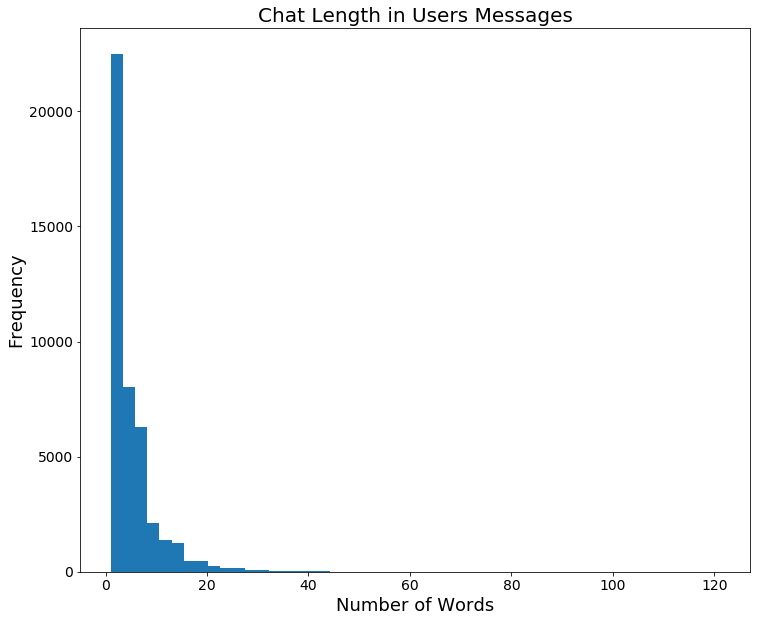

In [336]:
ax=df3['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Chat Length in Users Messages', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18)
fig = ax.get_figure()
fig.savefig('word_length_in_messages.png')

In [337]:
df3['uniq_wds'] = df['clean_data'].str.split().apply(lambda x: len(set(x)))
df3['uniq_wds'].head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



2     1
4     1
6     6
11    1
16    1
Name: uniq_wds, dtype: int64

In [338]:
df3['uniq_wds'].mean()

4.833502327510716

In [339]:
df3['uniq_wds'].max()

95

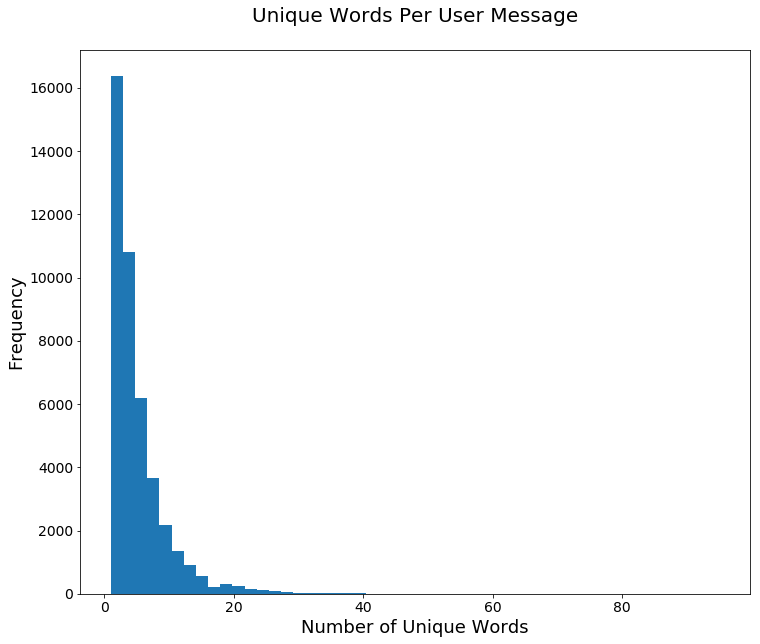

In [340]:
ax=df3['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,10))
ax.set_title('Unique Words Per User Message\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);
fig = ax.get_figure()
fig.savefig('unique_words_in_messages.png')